Σε αυτό το notebook υλοποιώ τις μεθόδους KPCA και LDA from scratch.

## KPCA
Η ιδέα την KPCA είναι να κάνουμε PCA στον kernel space, ο οποίος έχει μεγαλύτερη διάστασης (πιθανότατα χώρος hilbert άπειρης διάστασης) από τον χώρο των δειγμάτων μας. Η αύξηση της διαστασημότητας γίνεται με την χρήση του kernel trick.

Ουσιαστικά πρέπει να κάνουμε ανάλυση ιδιοδιανυσμάτων του scatter matrix (πίνακα διασποράς) στον kernel space. Η ιδεά είναι να χρησιμοποιήσουμε το kernel trick και να κάνουμε έμμεση εύρεση αυτών των ιδιοδιανυσμάτων.

Συγκεκριμένα, έχουμε το εξής scatter matrix:
$$ S^{\phi}_t =  \frac{1}{M} \sum_{j=1}^{M} (\Phi(x_j) - m^{\phi})(\Phi(x_j) - m^{\phi})^T  $$

Αποδεικνύεται ότι τα ιδιοδιανύσματα του $S^{\phi}_t$ έχουμε 1-1 αντιστοιχεία και ίδες ιδιοτιμές με τα ιδιοδιανύσματα του κεντροποιημένου kernel matrix $K_c$, όπου $[K_c]_{ij} = k_{ij} - \frac{1}{M} sr(i) - \frac{1}{M} sr(j) + \frac{1}{M^2} s $, με $ sr(i) = \sum_{l=1}^{M} k_{il} $ το άθροισμα των τιμών στην γραμμή $i$, $ sc(i) = \sum_{l=1}^{M} k_{lj} $ το άθροισμα τιμών στην στήλη $j$ και $s = \sum_{i=1}^{M} \sum_{j=1}^{M} k_{ij} $ το άθροισμα όλων των τιμών του πίνακα. Ο παραπάνω πίνακας ευρίσκεται με τον εξής τρόπο:
$$ K_c = K + 1_M K + K1_M + 1_MK1_M $$ όπου $1_M$ είναι ο $Μ \times M$ πίνακας που όλες οι τιμές του είναι ίσες με $\frac{1}{M}$. Μπορούμε εύκολα να αποδείξουμε ότι η παραπάνω σχέση ισχύει.

Έστω $ \gamma_1, \cdots, \gamma_n$ τα ιδιοδανύσματα με θετικές ιδιοτημές $ \lambda_1 \geq \cdots \geq \lambda_n $ του $K_c$. Έστω επίσης $ \beta_1, \cdots, \beta_{n'} $ τα ιδιοδανύσματα με θετικές ιδιοτημές $ \lambda_1' \geq \cdots \geq \lambda_n'$ του $S^{\phi}_t$. Έχουμε $n = n'$,  $ \lambda_1 = \lambda_1', \cdots, \lambda_n = \lambda_n' $ και $$ \beta_i = \frac{1}{\sqrt{\lambda_{i}}} \begin{bmatrix} \Phi(x_1) & \cdots & \Phi(x_M) \end{bmatrix} \gamma_{i}  $$

Η παραπάνω σχέση μπορεί να ερμηνευτεί ως ο μετασχηματισμός του $\gamma_i$ στον υποχώρο του kernel space που ορίζεται από τα training samples. Το διάνυσμα που προκύπτει ανήκει στο span του $\beta_i$ με scaled κάποιον αριθμό.

Αφού υπολογίσουμε τα eigenvectors του $S^{\phi}_t$, μπορούμε να προβάλουμε σημεία στον μειωμένο KPCA χώρο με παρόμοιο τρόπο όπως στην PCA ($k$ η διάσταση του KPCA χώρου): 
$$ y = \begin{bmatrix} \beta_1 & \cdots & \beta_k \end{bmatrix}^T \Phi(x) $$

Για την $i$-οστή διάσταση $y_i$ έχουμε:
$$ \tag{1} y_i = \beta_i^T \phi(x) =  \frac{1}{\sqrt{\lambda_{i}}} \gamma_{i}^T \begin{bmatrix} \Phi(x_1) & \cdots & \Phi(x_M) \end{bmatrix}^T \phi(x) = \frac{1}{\sqrt{\lambda_{i}}} \gamma_{i}^T \begin{bmatrix} k(x, x_1) & \cdots & k(x, x_m) \end{bmatrix}^T $$

Το $\gamma_i$ είναι col vector, άρα η $i$-στη διάσταση του διανύσματος που προκύπτει είναι το εσωτερικό γινόμενου του $i$-στου ιδιοδιανύσματος του $K_c$ με το διάνυσμα που προκύπτει από την εφαρμογή του kernel function μεταξύ του δείγματος και των training samples.

Συνοψίζοντας, έχουμε την εξής διαδικασία για την υλοποίηση του KPCA αλγόριθμόυ μας:
1. Δημιουργία του $M \times M$ kernel matrix $K$.
2. Υπολογισμόυς του $K_c$ με την χρήση του $ K_c = K + 1_M K + K1_M + 1_MK1_M $.
3. Εύρεση των θετικών ιδιοδιανυσμάτων του $K_c$ και ταξινόμησή τους σε φθίνουσα σειρά με βάση την τιμή της ιδιοτιμής τους. Μπορούμε να επιλέξουμε έναν μικρότερο αριθμό διανυσμάτων για την μείωση δίαστασης, ανάλογα με την  διάσταση που θέλουμε να έχει ο KPCA χώρος μας.

Για την μείωση διάστασης ενός δεδομένου εισόδου, χρησιμοποιούμε την $(1)$ για τον υπολογισμό του διανύσματος στην μειωμένη διάσταση. Μπορούμε να κάνουμε τον εξής πολλαπλασιασμό πινάκων για κάθε δεδομένο εισόδου:
$$ y = \begin{bmatrix} \frac{1}{\sqrt{\lambda_1}}\gamma_1 & \cdots & \frac{1}{\sqrt{\lambda_k}}\gamma_k \end{bmatrix}^T \begin{bmatrix} k(x, x_1) \\ \vdots \\ k(x, x_m) \end{bmatrix} $$

In [2]:
import numpy as np

In [342]:
class KPCA:
    def __init__(self, kernel_fn, num_comp=None):
        self.num_comp = num_comp
        self.kernel_fn = kernel_fn

    def _create_kernel_matrix(self, X):
        return np.array([ [ self.kernel_fn(x1, x2) for x1 in X ] for x2 in X ])
    
    def _create_kernel_matrix_cross(self, X_old, X_in):
        return np.array([ [ self.kernel_fn(x_r, x_c) for x_c in X_in ] for x_r in X_old ])
    
    def fit(self, X):
        self.X = X
        
        K = self._create_kernel_matrix(X)
        M = X.shape[0]
        
        one_M = np.ones((M, M)) / M
        Kc = K - one_M @ K - K @ one_M + one_M @ K @ one_M
        
        # eigh used for eigenanalysis in a symmetric matrix like Kc, sorted in asc order
        eigenvals, eigenvecs = np.linalg.eigh(Kc)
        
        eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[::-1] # reverse to desc order
        
        # retain vectors that are only slightly above 0
        retain_ind = eigenvals > 1e-10
        eigenvals, eigenvecs = eigenvals[retain_ind], eigenvecs[retain_ind, :]
        
        if self.num_comp is not None and eigenvals.shape[0] > self.num_comp: # discard uwanted eigenvectors
            eigenvals, eigenvecs = eigenvals[:self.num_comp], eigenvecs[:self.num_comp]
            
        # Construct the compact matrix used on the final dot product
        scale_factor = 1 / np.sqrt(eigenvals) # 1 / sqrt(l_i)
        
        # transpose matrix to apply scaling row-wise (ie on each eigenvector)
        self.compact_eigenv_matrix = eigenvecs * scale_factor[:, np.newaxis] 
                
    def transform(self, X):
        if not hasattr(self, 'compact_eigenv_matrix'):
            raise RuntimeError("Call `fit` before `transform`.")
        
        kernel_vec = self._create_kernel_matrix_cross(self.X, X)
        
        return (self.compact_eigenv_matrix @ kernel_vec).T
        
        

Δοκιμή με τυχαίο παράδειγμα:

In [343]:
import numpy as np

# Define an RBF kernel
#def rbf_kernel(x1, x2, gamma=.00000001):
#    return np.exp(-gamma * np.linalg.norm(x1 - x2) ** 2)
# RBF kernel centers test samples near (0, 0)

# Generate some data
np.random.seed(0)
X_train = np.random.randn(100, 50)
X_test = np.random.randn(20, 50)

# Fit KPCA
kpca = KPCA(kernel_fn=lambda x1, x2: np.dot(x1, x2), num_comp=2)
kpca.fit(X_train)

# Transform data
X_train_kpca = kpca.transform(X_train)
X_test_kpca = kpca.transform(X_test)

print("Transformed Training Data Shape:", X_train_kpca.shape)
print("Transformed Test Data Shape:", X_test_kpca.shape)



Transformed Training Data Shape: (100, 2)
Transformed Test Data Shape: (20, 2)


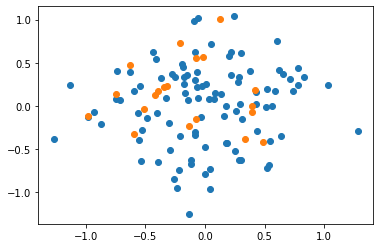

In [345]:
import matplotlib.pyplot as plt

plt.scatter(X_train_kpca[:, 0], X_train_kpca[:, 1])
plt.scatter(X_test_kpca[:, 0], X_test_kpca[:, 1])

## LDA
Για την LDA, έχουμε να ελαχιστοποιήσουμε το Fisher's criterion:
$$ J(w) = \frac{w^TS_bw}{w^TS_ww}, \quad \textrm{s.t.} \quad \lVert w \rVert = 1 $$
όπου $S_b$ ο between-class scatter matrix και $S_w$ ο within-class scatter matrix και ορίζονται ως εξής:
$$ S_b = \frac{1}{M} \sum_{i=1}^{C} l_i(m_i - m)(m_i - m)^T \\ 
   S_w = \frac{1}{M} \sum_{i=1}^{C}\sum_{j=1}^{l_i} (x_{i,j} - m_i)(x_{i,j} - m_j)^T $$
όπου $C$ ο αριθμός των κλάσεων, $l_i$ ο αριθμός των δειγμάτων της $i$-οστής κλάσης, $x_{i,j}$ το $j$-οστό δείγμα της $i$-οστής κλάσης, $m_i$ ο μέσος όρος των δειγμάτων της $i$-οστής κλάσης, $m$ ο μέσος όρος όλων των δειγμάτων στο σύνολό μας.

Λύση του παραπάνω προβλήματος βελτιστοποίησης αποτελόυν οι λύσεις της εξίσωσης $S_bw = \lambda S_w w$. Ένας τρόπος να λυθεί η εξίσωση είναι να μετατραπεί σε πρόβλημα ιδιοανάλυσης $(S_w^-1 S_b)w = \lambda w$. Αν o $S_w$ δεν είναι αντιστρέψιμος, μπορούμε να προσθέσουμε λίγο θόρυβο ως εξής: για μικρή τιμή $\lambda$, αντιστρέφουμε την $S_w + \lambda I_m$. Η παραπάνω προσέγγιση λειτουργεί σε χρόνο $O(n^3)$.

Συνοψίζοντας, έχουμε τον εξής αλγόριθμο για την LDA:
1. Υπολογισμός των $S_b$, $S_w$.
2. Υπολογισμός του $S_w^{-1} S_b$, με κατάλληλη πρόσθεση θορύβου αν $S_w$ μη-αντιστρέψιμο.
3. Εύρεση ιδιοδιανυσμάτων $v_1, \cdots, v_k$ του $S_w^{-1} S_b$.

Για την μείωση δίαστασης καινούργιων δεδομένων, κάνουμε παρόμοια δουλειά με το KPCA:
$$ y(x) = \begin{bmatrix} v_1 & \cdots & v_k \end{bmatrix}^T x $$

In [538]:
class LDA:
    def __init__(self, num_comp=None, inv_mode='inv'):
        self.num_comp = num_comp
        self.inv_mode = inv_mode
    
    def _infer_num_classes(self, y):
        return len(set(y)) # count unique occurences on the y vector
    
    def _split_dataset_by_class(self, X, y):
        # In functional programming, this can be achieved by a groupBy operator
        buckets = dict()

        for data, label in zip(X, y):
            if label not in buckets:
                buckets[label] = []

            buckets[label].append(data)

        for label in buckets:
            buckets[label] = np.array(buckets[label])

        return list(buckets.values())
    
    def fit(self, X, y):
        M = X.shape[1]
        
        num_classes = self._infer_num_classes(y)
        
        # First find group all elements by class
        samples_by_class = self._split_dataset_by_class(X, y)
        
        # Next, calculate the mean vectors for each class and globally
        m = np.mean(X, axis=0) # find mean for every column (feature)
        m_c = [ np.mean(X_c, axis=0) for X_c in samples_by_class ]
        
        # Calculate S_b
        S_b = np.zeros((M, M))
        
        for i in range(num_classes):
            # outer product: equivalent to matmul uv^T for vectors
            S_b += len(samples_by_class[i]) * np.outer(m_c[i] - m, m_c[i] - m)
        
        # Calculate S_w
        S_w = np.zeros((M, M))
        
        for i in range(num_classes):
            curr_class_data = samples_by_class[i]
            
            for j in range(curr_class_data.shape[0]):
                curr_sample = curr_class_data[j]
                
                S_w += np.outer(curr_sample - m_c[i], curr_sample - m_c[i])
        
        # Add noise to S_w to make it invertible
        
        noise = 1e-6
        S_wn = S_w + noise * np.eye(S_w.shape[0])
        
        # Calculate matrix for eigenanalysis and find eigenvectors
        if self.inv_mode == 'inv':
            P = np.linalg.inv(S_w) @ S_b
        elif self.inv_mode == 'noise':
            P = np.linalg.inv(S_wn) @ S_b
        elif self.inv_mode == 'pinv':
            P = np.linalg.pinv(S_w) @ S_b # alternative: use pinv directly on S_w:
        else: # not allowed
            print('Mode not supported!!')
            P = np.linalg.inv(S_w) @ S_b
        
        
        # Perform eigenanalysis on P
        eigenvals, eigenvecs = np.linalg.eig(P)
        
        # Eigenvectors need to be sorted in desc order
        sorted_indices = np.argsort(-eigenvals) # minus to enforce desc order sorting
        eigenvals, eigenvecs = eigenvals[sorted_indices], eigenvecs[sorted_indices, :]    
        
        # Retain vectors that are only slightly above 0, like KPCA
        retain_ind = eigenvals > 1e-10
        eigenvecs = eigenvecs[retain_ind, :]
        
        if self.num_comp is not None and eigenvals.shape[0] > self.num_comp: # discard unwanted eigenvectors
            eigenvecs = eigenvecs[:self.num_comp] # might not work properly if not sorted in desc order
        
        self.eigenvecs = eigenvecs

        
    def transform(self, X):
        return (self.eigenvecs @ X.T).T
        
        

Δοκιμή με τυχαίο παράδειγμα:

In [539]:
# Use when P = np.linalg.inv(S_w) @ S_b
# Generate some data
np.random.seed(0)
X = np.random.randn(100, 50)
y = np.arange(10).repeat(10)


# LDA with simple inverse
lda_inv = LDA(num_comp=2, inv_mode='inv')
lda_inv.fit(X, y)
X_lda_inv = lda_inv.transform(X)

# LDA with pseudo inverse
lda_pinv = LDA(num_comp=2, inv_mode='pinv')
lda_pinv.fit(X, y)
X_lda_pinv = lda_pinv.transform(X)

# LDA with noise
lda_n = LDA(num_comp=2, inv_mode='noise')
lda_n.fit(X, y)
X_lda_n = lda_n.transform(X)

print("Transformed Training Data Shape:", X_lda_inv.shape)

Transformed Training Data Shape: (100, 2)


Text(0.5, 1.0, 'LDA adding noise to diagonals of S_w and inverting')

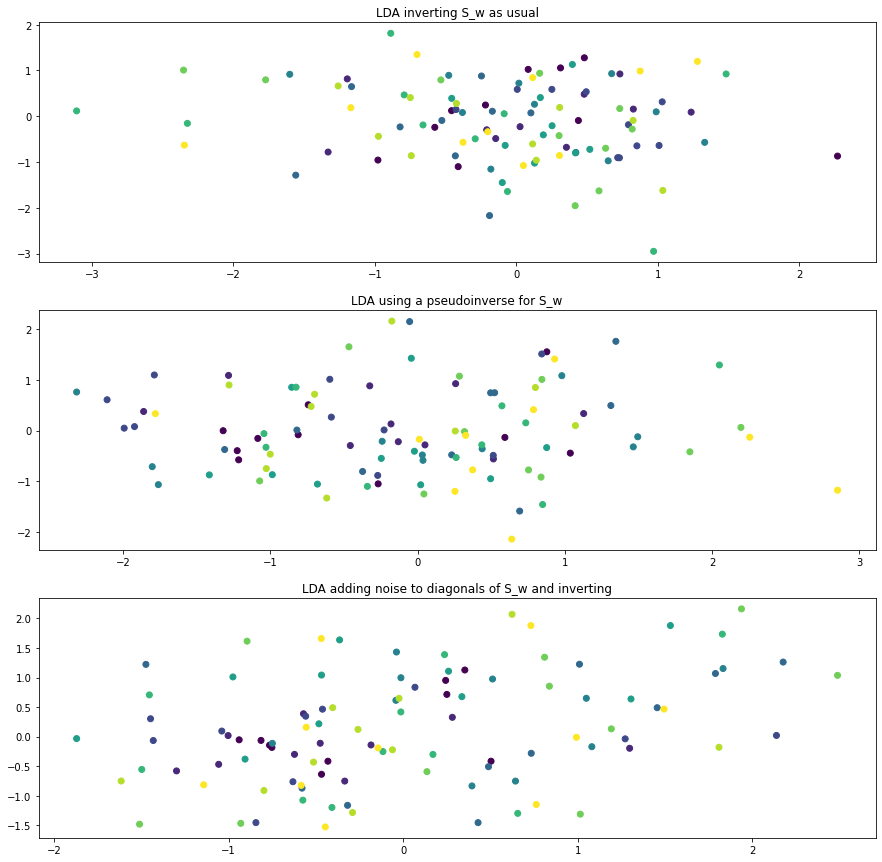

In [545]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 1, figsize=(15, 15))

axs[0].scatter(X_lda_inv[:, 0], X_lda_inv[:, 1], c=y_train)
axs[0].set_title('LDA inverting S_w as usual')

axs[1].scatter(X_lda_pinv[:, 0], X_lda_pinv[:, 1], c=y_train)
axs[1].set_title('LDA using a pseudoinverse for S_w')

axs[2].scatter(X_lda_n[:, 0], X_lda_n[:, 1], c=y_train)
axs[2].set_title('LDA adding noise to diagonals of S_w and inverting')